<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Create-ICA_DATA-Object" data-toc-modified-id="Import-Data-and-Create-ICA_DATA-Object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Create ICA_DATA Object</a></span><ul class="toc-item"><li><span><a href="#Rename-iModulons" data-toc-modified-id="Rename-iModulons-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rename iModulons</a></span></li></ul></li><li><span><a href="#Create-Core-Lipid-Response" data-toc-modified-id="Create-Core-Lipid-Response-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create Core Lipid Response</a></span><ul class="toc-item"><li><span><a href="#Create-Venn-Diagram" data-toc-modified-id="Create-Venn-Diagram-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create Venn Diagram</a></span></li></ul></li></ul></div>

In [5]:
from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *
from pymodulon.util import *

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns

from matplotlib.lines import Line2D
from os import path

# Import Data and Create ICA_DATA Object

In [6]:
interim = path.join("..","data","interim","ica_runs","180")
processed = path.join("..","data","processed_data")

ica_data = IcaData(path.join(interim,"S.csv"),
                   path.join(interim,"A.csv"), 
                   X=path.join(processed,"log_tpm_norm.csv"),
                   sample_table=path.join(processed,"metadata_final.csv"), 
                   trn = path.join(processed,"TRN.csv"),
                   gene_table=path.join(processed,"gene_info.csv"))


## Rename iModulons

In [8]:
comp_names = list(pd.read_csv(path.join(processed,"iModulon_names.csv"),index_col=0).index)

rename = {}

for old,new in zip(range(0,80),comp_names):
    rename.update({old:new})

ica_data.rename_imodulons(rename)

ica_data.change_threshold("Central Carbon Metabolism",.05)
ica_data.change_threshold("Peptidoglycan Biosynthesis",.06)


ica_data.A.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
SigH,2.233529,1.747683,1.950159,1.272614,2.236327,1.461665,1.721740,1.716646,0.199084,-0.199084,...,-0.073048,-0.089859,-0.056653,0.272666,0.561386,0.565625,0.928080,0.692540,0.989420,0.978320
Polyketide Synthase Complex,-1.006571,-1.096669,-1.035640,-1.020379,-1.284973,-1.032381,-0.228997,-0.436043,-0.339446,0.339446,...,-0.060317,0.071409,0.197522,4.220594,4.335245,4.791054,2.873865,3.053068,3.106209,2.544357
IniR,-1.633546,-1.525702,-0.973362,-0.412119,-1.575615,-0.661602,-0.413391,-1.286532,-0.227573,0.227573,...,-0.082660,-0.249290,0.542238,-1.337300,-1.332386,-0.657241,-1.025463,-0.751884,-0.543233,-0.929784
PyrR,0.724746,0.685656,0.463208,0.779347,0.891500,0.706596,1.367180,1.396856,0.426180,-0.426180,...,0.094624,0.297912,-0.241379,1.186755,0.660442,0.640216,1.951114,2.235133,2.241501,1.747601
WhiB4,-0.187071,0.778767,-0.132223,0.820021,0.097570,1.035989,1.112930,0.707870,0.450103,-0.450103,...,-0.196057,-0.186073,0.212741,1.362617,1.387968,1.945811,1.459615,2.011044,1.298987,1.454773


# Create Core Lipid Response

In [10]:
# Import additional experiments to complete project
lipid_experiments = ica_data.sample_table.groupby("project")
for i,j in lipid_experiments:
    if i == "lipid":
        lipid_experiments = list(j.index)
lipid_experiments.append("SRX2923404")
lipid_experiments.append("SRX2923405")
lipid_data = pd.read_csv(path.join("..","data","raw_data","log_tpm.csv"),index_col=0)
lipid_data = lipid_data[lipid_experiments]
ref_cond =  list(lipid_data[["SRX2923393","SRX2923394"]].mean(axis=1))
lipid_data = lipid_data.sub(ref_cond,axis='rows')

In [11]:
# Infer activities using iModulon structure
infered_DF = infer_activities(ica_data,lipid_data)
infered_DF.head()

/opt/conda/lib/python3.9/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,SRX2923393,SRX2923394,SRX2923398,SRX2923397,SRX2923395,SRX2923396,SRX2923400,SRX2923401,SRX2923403,SRX2923402,SRX2923404,SRX2923405
SigH,0.057442,-0.057442,-12.912102,-3.436625,-10.142456,-10.084640,3.012691,0.858571,-3.091673,-3.278615,-12.612940,-16.665793
Polyketide Synthase Complex,-0.302839,0.302839,-10.512489,-5.542817,-7.247611,-6.742112,-0.400105,-0.857280,-2.668810,-4.140610,-9.083283,-5.139485
IniR,-0.248915,0.248915,0.565826,3.422091,-4.417374,-4.406843,-1.285753,-1.380440,-4.460432,-5.450464,-3.450068,-2.295534
PyrR,0.206370,-0.206370,3.712164,0.980666,8.533167,8.559134,2.268166,2.471570,6.590458,6.143413,5.266210,5.246998
WhiB4,-0.097511,0.097511,-3.406089,-3.439537,-1.526688,-1.634558,3.203432,1.981410,-4.083888,-2.980453,-6.180084,-4.874070


In [12]:
# Calculate mean from replicates
groups = ica_data.sample_table.groupby(["project","condition"])
infered_DF_mean = pd.DataFrame(index = infered_DF.index)
for i,j in groups:
    if i[0] == "lipid":
        infered_DF_mean[i[1]] = infered_DF[list(j.index)].mean(axis=1)
infered_DF_mean["lipid_hypo"] = infered_DF[["SRX2923404","SRX2923405"]].mean(axis=1)
infered_DF_mean

,dextrose_exp,dextrose_hypo,dextrose_stat,lipid_exp,lipid_stat,lipid_hypo
SigH,1.144917e-16,-8.174363,-10.113548,1.935631,-3.185144,-14.639366
Polyketide Synthase Complex,-1.387779e-16,-8.027653,-6.994862,-0.628692,-3.404710,-7.111384
IniR,1.665335e-16,1.993958,-4.412108,-1.333097,-4.955448,-2.872801
PyrR,3.469447e-16,2.346415,8.546151,2.369868,6.366935,5.256604
WhiB4,-2.498002e-16,-3.422813,-1.580623,2.592421,-3.532170,-5.527077
...,...,...,...,...,...,...
Unc_9,-2.775558e-16,-1.170114,-0.954240,-2.214911,-3.175710,-1.540187
SG_13,4.440892e-16,-2.277123,2.627593,-0.276788,0.763877,-0.947224
Central Carbon Metabolism,-5.551115e-17,-17.562295,-20.916565,4.130486,-12.418338,-23.173578
Positive Regulation of Growth,-2.081668e-16,1.420299,10.939089,9.202364,5.895960,7.125229


In [13]:
# Create Infered Means DataFrame
infered_DF_mean = infered_DF_mean.reindex(columns = ["dextrose_exp","dextrose_hypo","dextrose_stat",
                                  "lipid_exp","lipid_hypo","lipid_stat",])

In [14]:
#Import additional packages to asses differential activities
from pymodulon.enrichment import FDR
from scipy import stats

# Calculate differentially expressed gene with difference greater than 5
_diff = pd.DataFrame()
dist = {}

for name, group in ica_data.sample_table.groupby(["project", "condition"]):
    for i1, i2 in combinations(group.index, 2):
        _diff[":".join(name)] = abs(ica_data.A[i1] - ica_data.A[i2])
for k in infered_DF_mean.index:
    dist[k] = stats.lognorm(*stats.lognorm.fit(_diff.loc[k].values)).cdf
    
lipid_core = []
for i in range(3):
    sample1 = infered_DF_mean.columns[i]
    sample2 = infered_DF_mean.columns[i+3]

    res = pd.DataFrame(index=infered_DF_mean.index)

    for k in res.index:
        a1 = infered_DF_mean.loc[k,sample1]
        a2 = infered_DF_mean.loc[k,sample2]
        res.loc[k,"difference"] = a2-a1
        res.loc[k,"pvalue"] = 1 - dist[k](abs(a1-a2))
    result = FDR(res,.1)
    result = result[(abs(result.difference)>5)].sort_values("difference",ascending=False)
    lipid_core.append((result))

In [15]:
# Create Core Lipid Response
core_response = set(lipid_core[0].index) & set(lipid_core[1].index) & set(lipid_core[2].index)
core_response

{'Mce3R', 'Positive Regulation of Growth', 'Rv0681', 'Rv2488c'}

## Create Venn Diagram

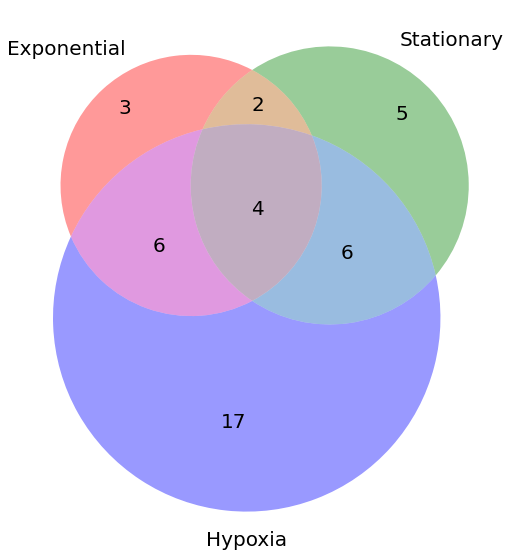

In [16]:
# Visualize Core Lipid Response with Venn
fig,ax = plt.subplots(figsize=[10,10])
# Define some sets
a = set(lipid_core[0].index) 
b = set(lipid_core[1].index) 
c = set(lipid_core[2].index) 
sets = [a, b, c]

# Plot it
out = venn3(sets, ('Exponential', 'Stationary', 'Hypoxia'))  
for text in out.set_labels:
    text.set_fontsize(20)
for text in out.subset_labels:
    text.set_fontsize(20)
plt.savefig("../figures/interim_figures/Core_Lipid_Response.svg",transparent=True)